# Dataset A

In [1]:
import pandas as pd
import numpy as np

#load in the data

dataframeA = pd.read_csv('../5. Dataset PCA/MeterA_pca_3.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

# yLbl = dataframeA[['Class Attruibute']]

#featuresVector
dataframeA

,PC1,PC2,PC3,Class Attruibute
0,-0.526258,5.566278,0.389358,1
1,1.016687,3.352036,0.894510,1
2,1.058280,1.844760,0.667599,1
3,-0.173012,1.540431,-0.850760,1
4,-0.280666,1.219715,-1.401910,1
...,...,...,...,...
78,0.724850,-3.055172,0.638940,2
79,0.965500,-3.437027,0.754479,2
80,0.177245,-3.400804,0.782970,2
81,0.471616,-2.909196,0.075192,2


In [2]:
dataframeA['Class Attruibute'] = dataframeA['Class Attruibute'].replace([1],'Healthy')
dataframeA['Class Attruibute'] = dataframeA['Class Attruibute'].replace([2],'Installation effects')
dataframeA

,PC1,PC2,PC3,Class Attruibute
0,-0.526258,5.566278,0.389358,Healthy
1,1.016687,3.352036,0.894510,Healthy
2,1.058280,1.844760,0.667599,Healthy
3,-0.173012,1.540431,-0.850760,Healthy
4,-0.280666,1.219715,-1.401910,Healthy
...,...,...,...,...
78,0.724850,-3.055172,0.638940,Installation effects
79,0.965500,-3.437027,0.754479,Installation effects
80,0.177245,-3.400804,0.782970,Installation effects
81,0.471616,-2.909196,0.075192,Installation effects


**Split the dataset into training and testing set with 70:30 split ratio**

In [3]:
from sklearn import tree

#Y = data['Class']
#X = data.drop(['Name','Class'],axis=1)

#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf = clf.fit(X, Y)

#extract features and target variables
x = dataframeA.drop(columns="Class Attruibute")
y = dataframeA["Class Attruibute"]
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()
labels.sort()

#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

print(x)

print(y)

         PC1       PC2       PC3
0  -0.526258  5.566278  0.389358
1   1.016687  3.352036  0.894510
2   1.058280  1.844760  0.667599
3  -0.173012  1.540431 -0.850760
4  -0.280666  1.219715 -1.401910
..       ...       ...       ...
78  0.724850 -3.055172  0.638940
79  0.965500 -3.437027  0.754479
80  0.177245 -3.400804  0.782970
81  0.471616 -2.909196  0.075192
82  0.042004 -2.488026  0.028047

[83 rows x 3 columns]
0                  Healthy
1                  Healthy
2                  Healthy
3                  Healthy
4                  Healthy
              ...         
78    Installation effects
79    Installation effects
80    Installation effects
81    Installation effects
82    Installation effects
Name: Class Attruibute, Length: 83, dtype: object


**Plot the graph with 17 different depths**

Text(0, 0.5, 'Accuracy')

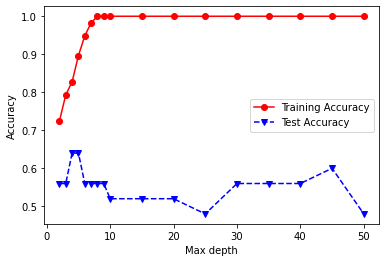

In [4]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(test_x)
    trainAccuracy[index] = accuracy_score(y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(test_lab, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [5]:
from sklearn.tree import DecisionTreeClassifier
# As can see from the above plot we choose max_depth=3
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Plot the tree structure**

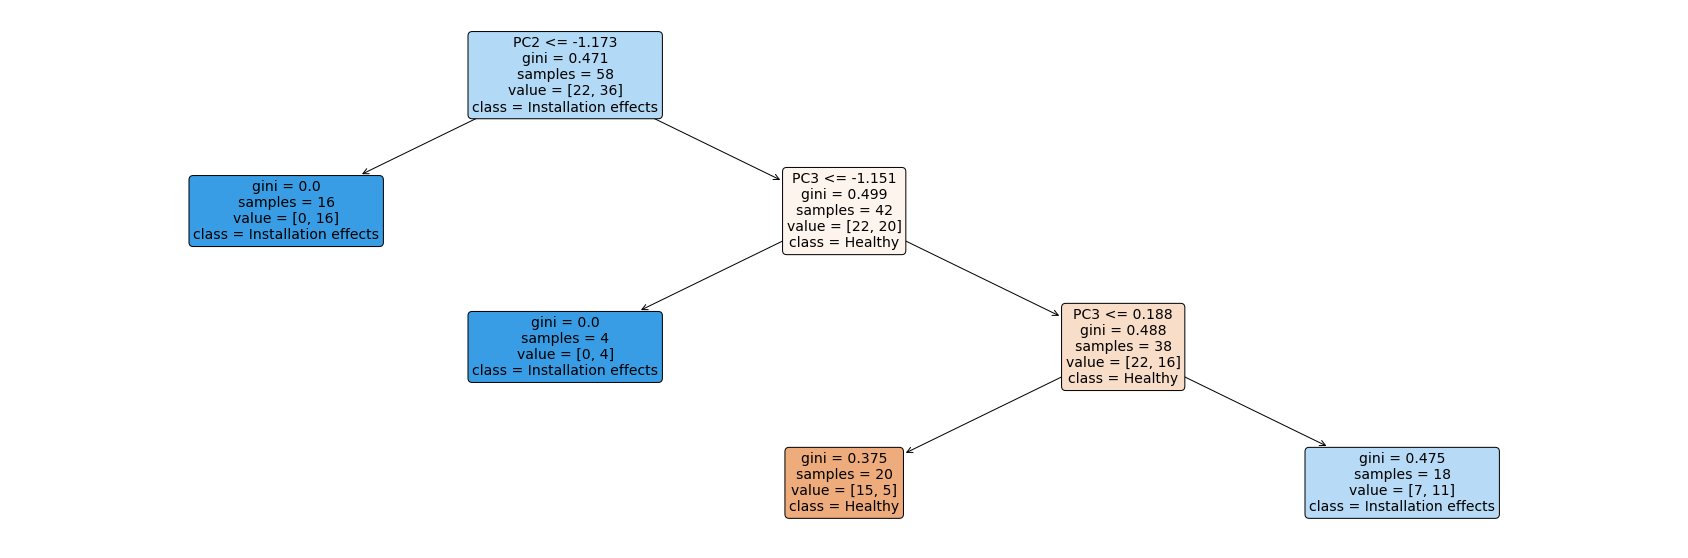

In [6]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()


In [7]:
# As a text based diagram
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- PC2 <= -1.17
|   |--- class: Installation effects
|--- PC2 >  -1.17
|   |--- PC3 <= -1.15
|   |   |--- class: Installation effects
|   |--- PC3 >  -1.15
|   |   |--- PC3 <= 0.19
|   |   |   |--- class: Healthy
|   |   |--- PC3 >  0.19
|   |   |   |--- class: Installation effects



In [8]:
#predict the class from the test values
test_pred_decision_tree = clf.predict(test_x)

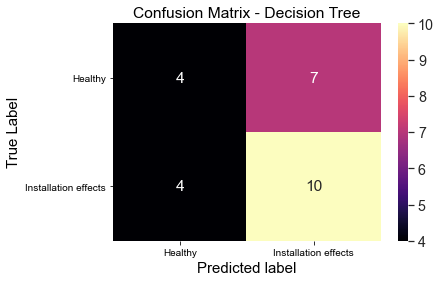

<Figure size 720x504 with 0 Axes>

In [9]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [10]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.56

In [11]:
print(metrics.classification_report(test_lab,
                                    test_pred_decision_tree))

                      precision    recall  f1-score   support

             Healthy       0.50      0.36      0.42        11
Installation effects       0.59      0.71      0.65        14

            accuracy                           0.56        25
           macro avg       0.54      0.54      0.53        25
        weighted avg       0.55      0.56      0.55        25



# Dataset B

In [12]:
#load in the data

dataframeB = pd.read_csv('../5. Dataset PCA/MeterB_pca_5.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl_B = dataframeB[['Class Attruibute']]

#featuresVector
dataframeB

,PC1,PC2,PC3,PC4,PC5,Class Attruibute
0,0.914365,-2.162769,0.436334,0.232154,-0.871197,1
1,0.866350,-2.170359,0.444587,0.242245,-0.847809,1
2,0.827614,-2.131012,0.144530,0.054445,-0.789386,1
3,0.808412,-2.068897,0.125245,0.036260,-0.780441,1
4,0.839467,-2.162049,0.158651,0.071625,-0.810679,1
...,...,...,...,...,...,...
63,-2.429585,0.832941,-0.426300,-0.064970,0.232033,3
64,-2.486759,0.867436,-0.380722,-0.085995,0.262152,3
65,-2.578565,0.878013,-0.349289,-0.081762,0.262557,3
66,-2.610512,0.871766,-0.295754,-0.034406,0.275316,3


In [13]:
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([1],'Healthy')
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([2],'Gas injection')
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([3],'Waxing')
dataframeB

,PC1,PC2,PC3,PC4,PC5,Class Attruibute
0,0.914365,-2.162769,0.436334,0.232154,-0.871197,Healthy
1,0.866350,-2.170359,0.444587,0.242245,-0.847809,Healthy
2,0.827614,-2.131012,0.144530,0.054445,-0.789386,Healthy
3,0.808412,-2.068897,0.125245,0.036260,-0.780441,Healthy
4,0.839467,-2.162049,0.158651,0.071625,-0.810679,Healthy
...,...,...,...,...,...,...
63,-2.429585,0.832941,-0.426300,-0.064970,0.232033,Waxing
64,-2.486759,0.867436,-0.380722,-0.085995,0.262152,Waxing
65,-2.578565,0.878013,-0.349289,-0.081762,0.262557,Waxing
66,-2.610512,0.871766,-0.295754,-0.034406,0.275316,Waxing


In [14]:
#Y = data['Class']
#X = data.drop(['Name','Class'],axis=1)

#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf = clf.fit(X, Y)

#extract features and target variables
x_B = dataframeB.drop(columns="Class Attruibute")
y_B = dataframeB["Class Attruibute"]
#save the feature name and target variables
feature_names_B = x_B.columns
labels_B = y_B.unique()
labels_B.sort()

#split the dataset
X_train_B, test_x_B, y_train_B, test_lab_B = train_test_split(x_B,y_B,
                                                 test_size = 0.3,
                                                 random_state = 42)

Text(0, 0.5, 'Accuracy')

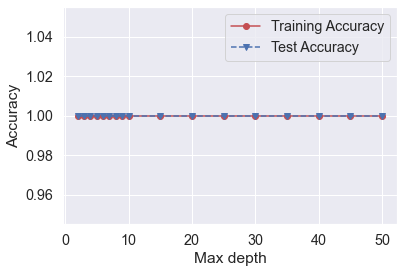

In [15]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train_B, y_train_B)
    Y_predTrain = clf2.predict(X_train_B)
    Y_predTest = clf2.predict(test_x_B)
    trainAccuracy[index] = accuracy_score(y_train_B, Y_predTrain)
    testAccuracy[index] = accuracy_score(test_lab_B, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [16]:
clf_B = DecisionTreeClassifier(max_depth = 4, random_state = 42)
clf_B.fit(X_train_B, y_train_B)

DecisionTreeClassifier(max_depth=4, random_state=42)

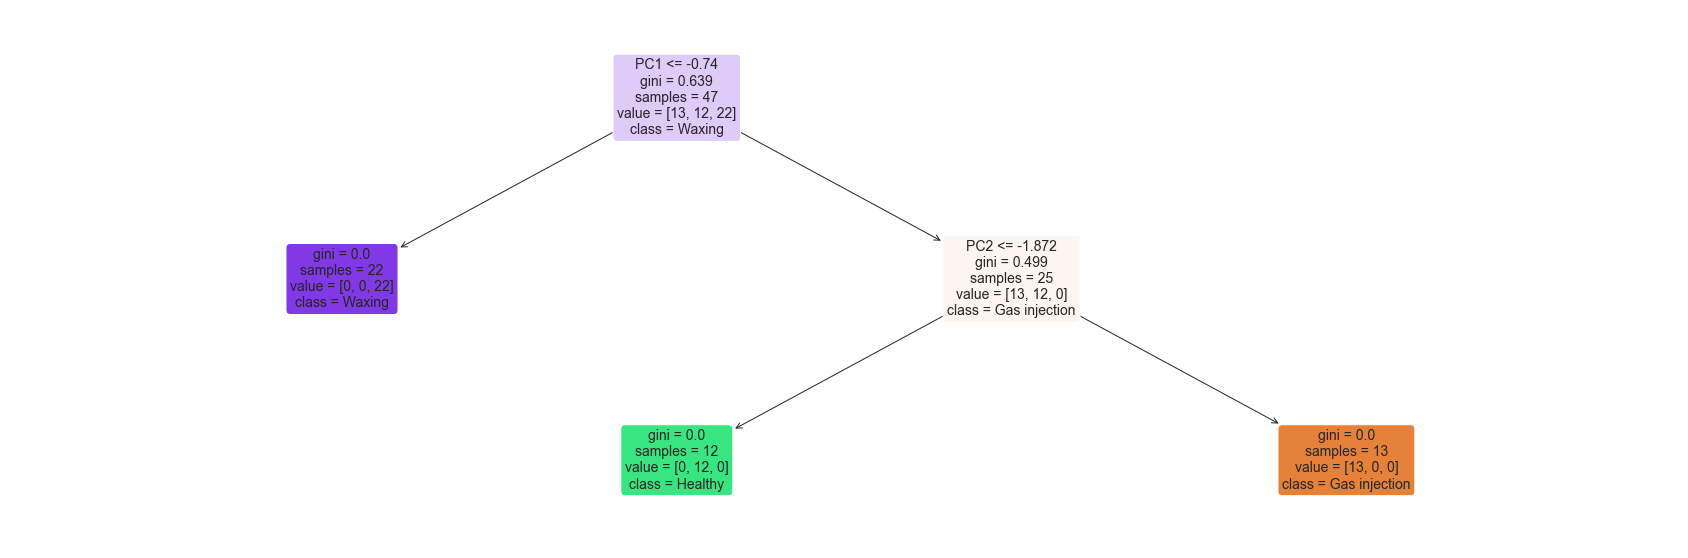

In [17]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf_B,
                   #use the feature names stored
                   feature_names = feature_names_B,
                   #use the class names stored
                   class_names = labels_B,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [18]:
# As a text based diagram
#import relevant functions
#export the decision rules
tree_rules_B = export_text(clf_B,
                        feature_names = list(feature_names_B))
#print the result
print(tree_rules_B)

|--- PC1 <= -0.74
|   |--- class: Waxing
|--- PC1 >  -0.74
|   |--- PC2 <= -1.87
|   |   |--- class: Healthy
|   |--- PC2 >  -1.87
|   |   |--- class: Gas injection



In [19]:
#predict the class from the test values
test_pred_decision_tree_B = clf_B.predict(test_x_B)


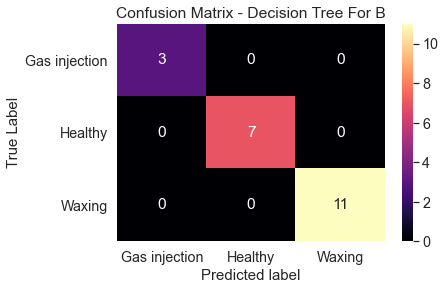

<Figure size 720x504 with 0 Axes>

In [20]:
#get the confusion matrix
confusion_matrix_B = metrics.confusion_matrix(test_lab_B,  
                                            test_pred_decision_tree_B)
#turn this into a dataframe
matrix_df_B = pd.DataFrame(confusion_matrix_B)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_B, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree For B')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels_B)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels_B), rotation = 0)
plt.show()

In [21]:
metrics.accuracy_score(test_lab_B, test_pred_decision_tree_B)

1.0

In [22]:
# recall_B = metrics.recall_score(test_lab_B, test_pred_decision_tree_B, 
# #                               average =None)
# # recall_results_B = pd.DataFrame(recall_B, index= labels_B)
# # recall_results_B.rename(columns ={0:'Recall For B'}, inplace =True)
# # recall_results_B

In [23]:
print(metrics.classification_report(test_lab_B,
                                    test_pred_decision_tree_B))

               precision    recall  f1-score   support

Gas injection       1.00      1.00      1.00         3
      Healthy       1.00      1.00      1.00         7
       Waxing       1.00      1.00      1.00        11

     accuracy                           1.00        21
    macro avg       1.00      1.00      1.00        21
 weighted avg       1.00      1.00      1.00        21



# Dataset C

In [24]:
#load in the data

dataframeC = pd.read_csv('../5. Dataset PCA/MeterC_pca_6.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl_C = dataframeC[['Class Attruibute']]

#featuresVector
dataframeC

,PC1,PC2,PC3,PC4,PC5,PC6,Class Attruibute
0,0.321708,-0.351911,-0.364762,-2.017334,-0.254753,0.404348,1
1,0.248324,-0.417809,-0.313521,-1.528833,-0.220375,0.249447,1
2,0.258434,-0.426496,-0.370236,-1.516422,-0.230660,0.245927,1
3,0.234022,-0.450655,-0.331455,-1.511043,-0.241599,0.230178,1
4,0.282905,-0.381927,-0.374808,-1.515987,-0.191599,0.248660,1
...,...,...,...,...,...,...,...
147,-0.597751,-0.767560,0.170713,1.922553,0.684865,-0.728860,4
148,-0.258729,-0.645355,-0.025784,0.378558,0.276915,-0.302619,4
149,-0.120922,-0.574330,-0.125284,-0.568236,0.095496,-0.047821,4
150,-0.010049,-0.509698,-0.213445,-1.003877,-0.010623,0.059439,4


In [25]:
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([1],'Healthy')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([2],'Gas injection')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([3],'Installation effects')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([4],'Waxing')

dataframeC

,PC1,PC2,PC3,PC4,PC5,PC6,Class Attruibute
0,0.321708,-0.351911,-0.364762,-2.017334,-0.254753,0.404348,Healthy
1,0.248324,-0.417809,-0.313521,-1.528833,-0.220375,0.249447,Healthy
2,0.258434,-0.426496,-0.370236,-1.516422,-0.230660,0.245927,Healthy
3,0.234022,-0.450655,-0.331455,-1.511043,-0.241599,0.230178,Healthy
4,0.282905,-0.381927,-0.374808,-1.515987,-0.191599,0.248660,Healthy
...,...,...,...,...,...,...,...
147,-0.597751,-0.767560,0.170713,1.922553,0.684865,-0.728860,Waxing
148,-0.258729,-0.645355,-0.025784,0.378558,0.276915,-0.302619,Waxing
149,-0.120922,-0.574330,-0.125284,-0.568236,0.095496,-0.047821,Waxing
150,-0.010049,-0.509698,-0.213445,-1.003877,-0.010623,0.059439,Waxing


In [26]:
#extract features and target variables
x_C = dataframeC.drop(columns="Class Attruibute")
y_C = dataframeC["Class Attruibute"]
#save the feature name and target variables
feature_names_C = x_C.columns
labels_C = y_C.unique()
labels_C.sort()

X_train_C, test_x_C, y_train_C, test_lab_C = train_test_split(x_C,y_C,
                                                 test_size = 0.3,
                                                 random_state = 20)

print(x_C)

print(y_C)
for i in y_train_C:
    print(i)
print(labels_C)

          PC1       PC2       PC3       PC4       PC5       PC6
0    0.321708 -0.351911 -0.364762 -2.017334 -0.254753  0.404348
1    0.248324 -0.417809 -0.313521 -1.528833 -0.220375  0.249447
2    0.258434 -0.426496 -0.370236 -1.516422 -0.230660  0.245927
3    0.234022 -0.450655 -0.331455 -1.511043 -0.241599  0.230178
4    0.282905 -0.381927 -0.374808 -1.515987 -0.191599  0.248660
..        ...       ...       ...       ...       ...       ...
147 -0.597751 -0.767560  0.170713  1.922553  0.684865 -0.728860
148 -0.258729 -0.645355 -0.025784  0.378558  0.276915 -0.302619
149 -0.120922 -0.574330 -0.125284 -0.568236  0.095496 -0.047821
150 -0.010049 -0.509698 -0.213445 -1.003877 -0.010623  0.059439
151 -0.008677 -0.498764 -0.232084 -0.984505  0.016030  0.061979

[152 rows x 6 columns]
0      Healthy
1      Healthy
2      Healthy
3      Healthy
4      Healthy
        ...   
147     Waxing
148     Waxing
149     Waxing
150     Waxing
151     Waxing
Name: Class Attruibute, Length: 152, dtype:

Text(0, 0.5, 'Accuracy')

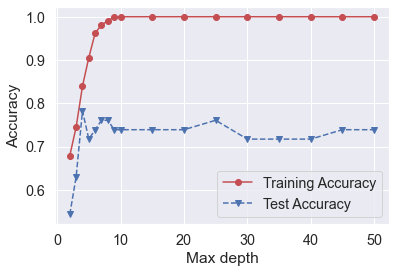

In [27]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train_C, y_train_C)
    Y_predTrain = clf2.predict(X_train_C)
    Y_predTest = clf2.predict(test_x_C)
    trainAccuracy[index] = accuracy_score(y_train_C, Y_predTrain)
    testAccuracy[index] = accuracy_score(test_lab_C, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [28]:
#As can see from the above we choose max_Depth = 6 for highest accuracy 
clf_C = DecisionTreeClassifier(max_depth =7, random_state = 20)
clf_C.fit(X_train_C, y_train_C)

DecisionTreeClassifier(max_depth=7, random_state=20)

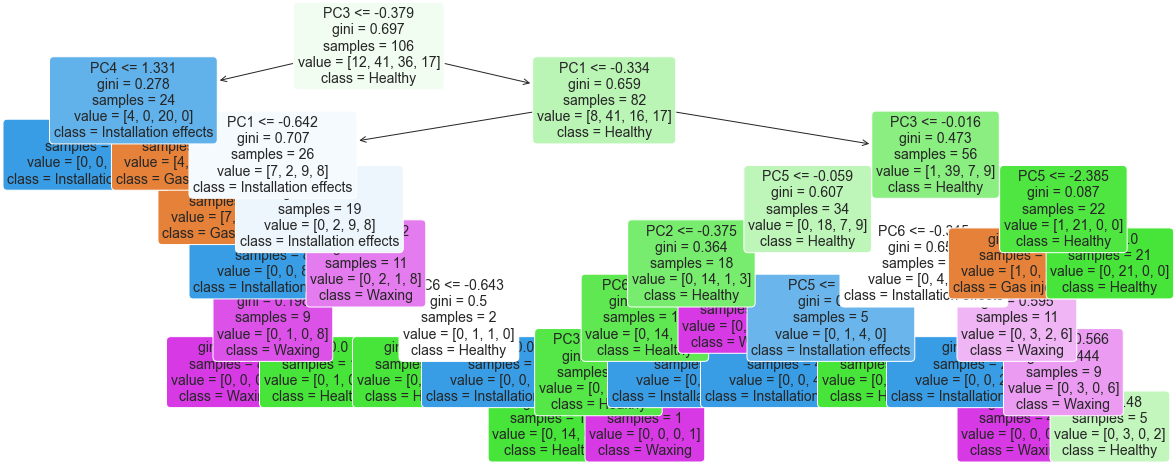

In [29]:
#plt the figure, setting a black background
plt.figure(figsize=(20,8), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf_C,
                   #use the feature names stored
                   feature_names = feature_names_C,
                   #use the class names stored
                   class_names = labels_C,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
# plt.show()

In [30]:
# As a text based diagram
#export the decision rules
tree_rules_C = export_text(clf_C,
                        feature_names = list(feature_names_C))
#print the result    
print(tree_rules_C)

|--- PC3 <= -0.38
|   |--- PC4 <= 1.33
|   |   |--- class: Installation effects
|   |--- PC4 >  1.33
|   |   |--- class: Gas injection
|--- PC3 >  -0.38
|   |--- PC1 <= -0.33
|   |   |--- PC1 <= -0.64
|   |   |   |--- class: Gas injection
|   |   |--- PC1 >  -0.64
|   |   |   |--- PC3 <= 0.01
|   |   |   |   |--- class: Installation effects
|   |   |   |--- PC3 >  0.01
|   |   |   |   |--- PC5 <= 0.71
|   |   |   |   |   |--- PC6 <= -0.47
|   |   |   |   |   |   |--- class: Waxing
|   |   |   |   |   |--- PC6 >  -0.47
|   |   |   |   |   |   |--- class: Healthy
|   |   |   |   |--- PC5 >  0.71
|   |   |   |   |   |--- PC6 <= -0.64
|   |   |   |   |   |   |--- class: Healthy
|   |   |   |   |   |--- PC6 >  -0.64
|   |   |   |   |   |   |--- class: Installation effects
|   |--- PC1 >  -0.33
|   |   |--- PC3 <= -0.02
|   |   |   |--- PC5 <= -0.06
|   |   |   |   |--- PC2 <= -0.38
|   |   |   |   |   |--- PC6 <= 0.46
|   |   |   |   |   |   |--- PC3 <= -0.17
|   |   |   |   |   |   |   |--

In [31]:
#predict the class from the test values
test_pred_decision_tree_C = clf_C.predict(test_x_C)

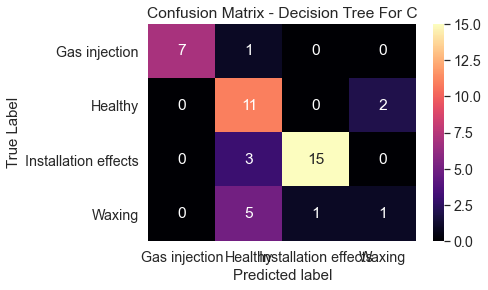

<Figure size 720x576 with 0 Axes>

In [32]:
#get the confusion matrix
confusion_matrix_C = metrics.confusion_matrix(test_lab_C,  
                                            test_pred_decision_tree_C)
#turn this into a dataframe
matrix_df_C = pd.DataFrame(confusion_matrix_C)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,8))
sns.heatmap(matrix_df_C, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree For C')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels_C)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels_C), rotation = 0)
plt.show()

In [33]:
metrics.accuracy_score(test_lab_C, test_pred_decision_tree_C)

0.7391304347826086

In [34]:
# #get the precision score
# precision_C = metrics.precision_score(test_lab_C,
#                                    test_pred_decision_tree_C, 
#                                    average=None)
# #turn it into a dataframe
# precision_results_C = pd.DataFrame(precision_C, index=labels_C)
# #rename the results column
# precision_results_C.rename(columns={0:'precision for C'}, inplace =True)
# precision_results_C

In [35]:
# recall_C = metrics.recall_score(test_lab_C, test_pred_decision_tree_C, 
#                               average =None)
# recall_results_C = pd.DataFrame(recall_C, index= labels_C)
# recall_results_C.rename(columns ={0:'Recall For C'}, inplace =True)
# recall_results_C

In [36]:
print(metrics.classification_report(test_lab_C,
                                    test_pred_decision_tree_C))

                      precision    recall  f1-score   support

       Gas injection       1.00      0.88      0.93         8
             Healthy       0.55      0.85      0.67        13
Installation effects       0.94      0.83      0.88        18
              Waxing       0.33      0.14      0.20         7

            accuracy                           0.74        46
           macro avg       0.71      0.67      0.67        46
        weighted avg       0.75      0.74      0.73        46



In [37]:
#extract importance
importance = pd.DataFrame({'feature': X_train_C.columns, 
'importance' : np.round(clf_C.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

  feature  importance
2     PC3       0.390
0     PC1       0.230
4     PC5       0.127
3     PC4       0.116
5     PC6       0.096
1     PC2       0.041
